# ML Semana 1 Grupo #777
- Natalia Nobre
- Joaquin Ferreira
- Mathias Rodriguez

### Configuración del ambiente:

In [135]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

### Importo los datos
Importo los datos usando <code>pandas.read_csv()</code>

In [136]:
# Importo con pandas para crear el Dataframe y lo nombro como "df"
url_csv = "vgsalesv3.csv"
df = pd.read_csv(url_csv, sep=';')

In [137]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [138]:
# run the profile report
profile = df.profile_report(title='Pandas Profiling Report')
# save the report as html file
profile.to_file(output_file="pandas_profiling1.html")
# save the report as json file
profile.to_file(output_file="pandas_profiling2.json")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 56.60it/s]


In [139]:
# Sacamos las columnas que no son utiles para el analisis
df.drop(columns=["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],inplace=True)

In [140]:
# sacamos año ya que muchos valores faltaban y eso es imporante para predecir las global sales en referencia a si 
# incrementan en el tiempo o no, y los campos faltantes de global sales ya que es la variable objetivo
df.dropna(subset=['Year','Global_Sales'], inplace=True)

In [141]:
df.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


In [142]:
# run the profile report
profile = df.profile_report(title='Pandas Profiling Report')
# save the report as html file
profile.to_file(output_file="pandas_profilingClean.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 130.65it/s]


In [143]:
dfTrain, dfTest = train_test_split(df, test_size = 0.20)

print("Ejemplos usados para entrenar: ", len(dfTrain))
print("Ejemplos usados para test: ", len(dfTest))


Ejemplos usados para entrenar:  13056
Ejemplos usados para test:  3265


In [144]:
dfTest.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales
4925,Taiko no Tatsujin Wii: Ketteiban,Wii,2011.0,Misc,Namco Bandai Games,0.39
5969,Power Pro Kun Pocket 4,GBA,2002.0,Sports,Konami Digital Entertainment,0.29
8980,Dragon Ball Z: Idainaru Dragon Ball Densetsu,SAT,1995.0,Fighting,Namco Bandai Games,0.15
10777,Ultimate Muscle - The Kinnikuman Legacy: The P...,GBA,2002.0,Fighting,Banpresto,0.10
8049,International Superstar Soccer 2000 (JP weekly...,N64,1999.0,Sports,Konami Digital Entertainment,0.18


In [145]:
dfTest.to_csv("test.csv")

In [146]:
dfTrain.to_csv("train.csv")

Coeficientes: [-0.021196]
Error: 3.452495870640265
Coeficiente de determinacion (R^2): % 0.0017346446923753867


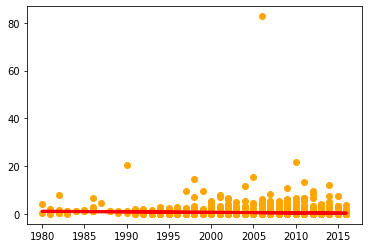

In [147]:
xTrain = np.array(dfTrain["Year"]).reshape((-1, 1))
yTrain = dfTrain['Global_Sales']
xTest = np.array(dfTest["Year"]).reshape((-1, 1))
yTest = dfTest['Global_Sales']

model = LinearRegression()
model.fit(xTrain, yTrain)
y_pred = model.predict(X = xTest)

# imprimimos los coeficientes y el error del modelo
print('Coeficientes:', model.coef_)
print('Error:', mean_squared_error(yTest, y_pred))
print('Coeficiente de determinacion (R^2): %', r2_score(yTest, y_pred))

plt.scatter(xTest, yTest,  color='orange')
plt.plot(xTest, y_pred, color='red', linewidth=3)

plt.show()